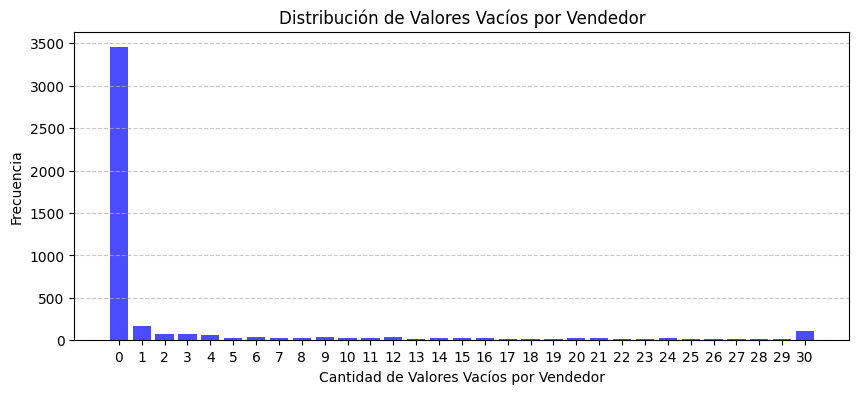

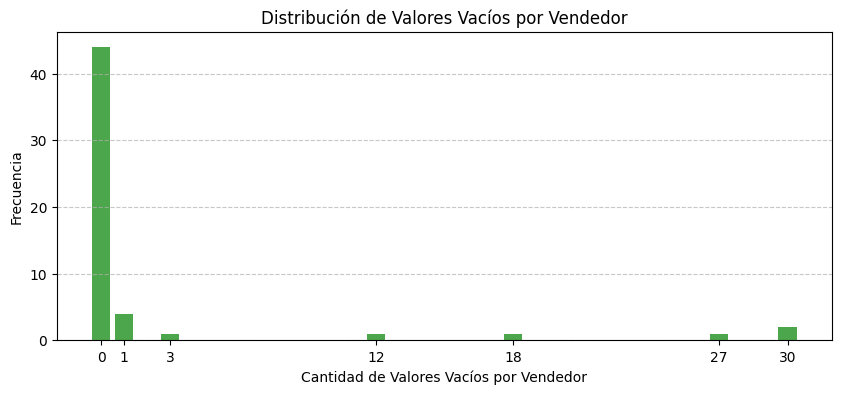

In [25]:
novo_interes = novo[['Modelo']+Y_Ven]

# Paso 1: Contar valores vacíos por fila
vacios_por_fila_0 = novo_interes[novo_interes['Modelo'] == 0].isnull().sum(axis=1)
vacios_por_fila_1 = novo_interes[novo_interes['Modelo'] == 1].isnull().sum(axis=1)

# Paso 2: Generar un resumen de cuántas filas tienen 0, 1, 2, 3, etc., valores vacíos
resumen_0 = vacios_por_fila_0.value_counts().reset_index()
resumen_0.columns = ['Cantidad de Valores Vacíos', 'Número de Filas']
resumen_0 = resumen_0.sort_values(by='Cantidad de Valores Vacíos')


resumen_1 = vacios_por_fila_1.value_counts().reset_index()
resumen_1.columns = ['Cantidad de Valores Vacíos', 'Número de Filas']
resumen_1 = resumen_1.sort_values(by='Cantidad de Valores Vacíos')

plt.figure(figsize=(10, 4))  # Tamaño del gráfico
plt.bar(resumen_0['Cantidad de Valores Vacíos'], resumen_0['Número de Filas'], color='blue', alpha=0.7, label='No mod')
plt.xlabel('Cantidad de Valores Vacíos por Vendedor')
plt.ylabel('Frecuencia')
plt.title('Distribución de Valores Vacíos por Vendedor')
plt.xticks(resumen_0['Cantidad de Valores Vacíos'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.figure(figsize=(10, 4))  # Tamaño del gráfico
plt.bar(resumen_1['Cantidad de Valores Vacíos'], resumen_1['Número de Filas'], color='green', alpha=0.7, label='Mod')
plt.xlabel('Cantidad de Valores Vacíos por Vendedor')
plt.ylabel('Frecuencia')
plt.title('Distribución de Valores Vacíos por Vendedor')
plt.xticks(resumen_1['Cantidad de Valores Vacíos'])
plt.grid(axis='y', linestyle='--', alpha=0.7)



# Muestra el gráfico
plt.show()


---
# Selección del Número de Clusters <span style="color:magenta">**(Paso 2)**</span>

### Elbow method

Para probar, le quito los vacíos.

(3630, 30)
(3502, 30)


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

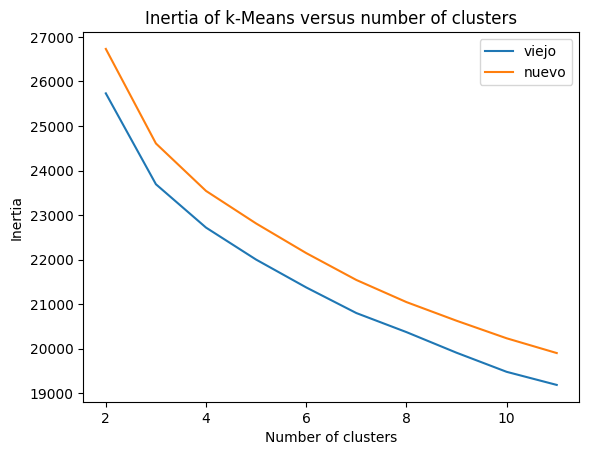

In [11]:
vectores_interes_sin_vacios = vectores_interes.dropna().copy()
print(vectores_interes_sin_vacios.shape)

# me quedo con el +-500% que se ve como un 5 acá OJO
vec_pm500 = vectores_interes_sin_vacios.where((vectores_interes_sin_vacios < 5) & (vectores_interes_sin_vacios > - 5))
vec_pm500 = vec_pm500.dropna()

vectores_interes_sin_vacios = vec_pm500

#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores1 = [KMeans(n_clusters=i, n_init=10).fit(vectores_interes_sin_vacios).inertia_ for i in range(2,12)]


vectores_interes_sin_vacios = novo_interes.dropna().copy()
print(vectores_interes_sin_vacios.shape)

# me quedo con el +-500% que se ve como un 5 acá OJO
vec_pm500 = vectores_interes_sin_vacios.where((vectores_interes_sin_vacios < 5) & (vectores_interes_sin_vacios > - 5))
vec_pm500 = vec_pm500.dropna()

vectores_interes_sin_vacios = vec_pm500

#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores2 = [KMeans(n_clusters=i, n_init=10).fit(vectores_interes_sin_vacios).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores1, label='viejo')
plt.plot(np.arange(2, 12), scores2, label='nuevo')
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.legend()
plt.title("Inertia of k-Means versus number of clusters")

plt.show()

---
## Aplicación de Modelos de Clustering <span style="color:magenta">**(Paso 3)**</span>

### K-means

In [15]:
vectores_interes_sin_vacios = vectores_interes.dropna().copy()

km = KMeans(n_clusters=3, n_init=10) # El parámetro n_init igual a 10 me lo pide para no tirar error. Ver luego qué implica.
km.fit(vectores_interes_sin_vacios)
clusters = km.labels_

vectores_clusters = vectores_interes_sin_vacios.copy()
vectores_clusters['kmeans_3'] = km.labels_
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')

# Esto está hecho metiendo a todos los rubros en la misma bolsa
# Hacer por subrubro
vectores_clusters['kmeans_3'].value_counts()

Kmeans encontró:  3 clusters, nosotros forzamos la cantidad


kmeans_3
0    3628
2       1
1       1
Name: count, dtype: int64

In [16]:
vectores_interes_sin_vacios = novo_interes.dropna().copy()

km = KMeans(n_clusters=3, n_init=10) # El parámetro n_init igual a 10 me lo pide para no tirar error. Ver luego qué implica.
km.fit(vectores_interes_sin_vacios)
clusters = km.labels_

vectores_clusters = vectores_interes_sin_vacios.copy()
vectores_clusters['kmeans_3'] = km.labels_
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')

# Esto está hecho metiendo a todos los rubros en la misma bolsa
# Hacer por subrubro
vectores_clusters['kmeans_3'].value_counts()

Kmeans encontró:  3 clusters, nosotros forzamos la cantidad


kmeans_3
0    3498
2       2
1       2
Name: count, dtype: int64

### PCA

In [17]:
std_scale=preprocessing.StandardScaler().fit(vec_pm500)
X_scaled=std_scale.transform(vec_pm500) # numpyarray Estandarizado (le resta la media y divide por el desvío) por columna

pca=decomposition.PCA(n_components=4) #elegimos 2, 3 o 4 pero pueden ser más,

pca.fit(X_scaled) #input data is centered but not scaled for each feature before applying the SVD

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

X_projected=pca.transform(X_scaled) #numpy array
print ('tamaño de los datos: ', X_projected.shape)


proporción de varianza por componente:  [0.17025947 0.15519927 0.09818554 0.0670242 ]
proporción de varianza por componente acumulada:  [0.17025947 0.32545874 0.42364428 0.49066847]
tamaño de los datos:  (2328, 4)


In [ ]:
X_tsne_kmeans_3 = pd.DataFrame(X_projected)
X_tsne_kmeans_3['kmeans_3'] = km.labels_

sns.scatterplot(data=X_tsne_kmeans_3,
                x=0, 
                y=1, 
                hue="kmeans_3", 
                palette="deep")#, alpha=0.25)

# sns.pairplot(X_projected)

In [ ]:
from sklearn import (manifold, preprocessing, decomposition)

tsne = manifold.TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(vec_pm500)

In [ ]:
X_tsne_kmeans_3 = pd.DataFrame(X_tsne)
X_tsne_kmeans_3['kmeans_3'] = km.labels_

sns.scatterplot(data=X_tsne_kmeans_3,
                x=0, 
                y=1, 
                hue="kmeans_3", 
                palette="deep")